In [77]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

X_b = np.c_[np.ones((100,1)), X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[4.04291768],
       [3.1363911 ]])

In [78]:
#Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X,y)

lin_reg.intercept_, lin_reg.coef_

(array([4.04291768]), array([[3.1363911]]))

In [79]:
#Batch Gradient Test

eta = 0.1
n_iterations = 50

m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) #Equation found on slides
    theta = theta - eta * gradients #update theta with the new values -- Like moving line on a graph

In [80]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

X_new_b.dot(theta)

array([[ 3.68590339],
       [10.56634107]])

In [81]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, eta0=0.1, penalty=None, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [82]:
print(sgd_reg.intercept_)
print(sgd_reg.coef_)

[4.02242329]
[3.15911019]


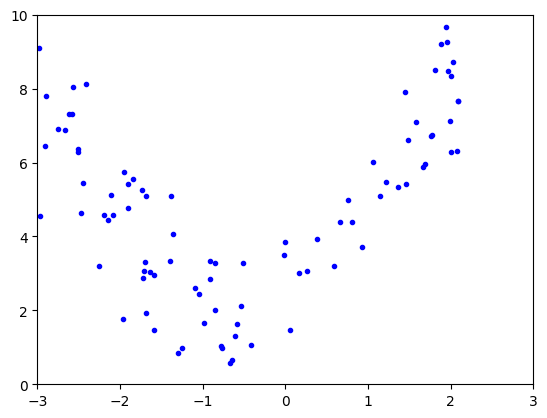

In [83]:
m = 100

X = 6 * np.random.rand(m,1)-3

y = 0.5 + X**2 + X + 2 + np.random.randn(m,1)

import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.axis([-3, 3, 0, 10])
plt.show()

In [84]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.61237864])

In [85]:
X_poly[0]

array([-2.61237864,  6.82452213])

In [86]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([2.52709423]), array([[1.00211139, 0.94323703]]))

In [87]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(solver='cholesky')
ridge_reg.fit(X, y.ravel())

ridge_reg.predict([[1.5]])

array([7.16980403])

In [88]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X, y.ravel())
lasso_reg.predict([[1.5]])

array([7.16960773])

In [89]:
from sklearn import datasets

iris = datasets.load_iris()

In [90]:

X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(int)

In [91]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [92]:
np.max(X)

2.5

In [93]:
preds = log_reg.predict(X)

In [94]:
from sklearn.metrics import confusion_matrix

confusion_matrix(preds, y)

array([[98,  4],
       [ 2, 46]], dtype=int64)